In [1]:
# 02_merge_and_eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
import datetime

# Setup logging
os.makedirs('../outputs', exist_ok=True)
logging.basicConfig(filename='../outputs/eda.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("📊 EDA notebook started")

In [7]:
# Set timestamp
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')

# Load merged training data (update file name if needed)
df = pd.read_csv('../data/store_train_20250621_143714.csv', dtype={'StateHoliday': str})
logging.info(f"Loaded store_train.csv with shape: {df.shape}")

In [9]:
# Filter open stores with non-zero sales (optional but good for visual clarity)
df = df[(df['Open'] == 1) & (df['Sales'] > 0)]
logging.info("Filtered out closed stores and zero sales")

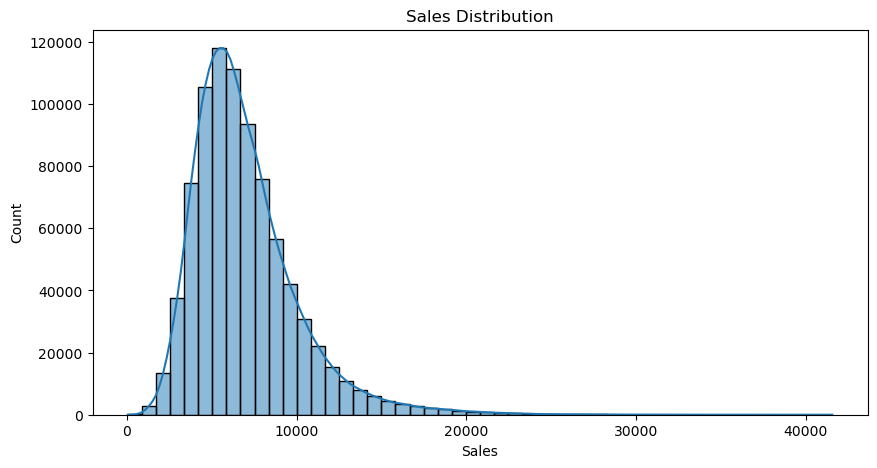

In [11]:
# 📈 1. Sales distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.savefig(f'../outputs/sales_distribution_{timestamp}.png')
plt.show()
logging.info("Saved: sales_distribution plot")


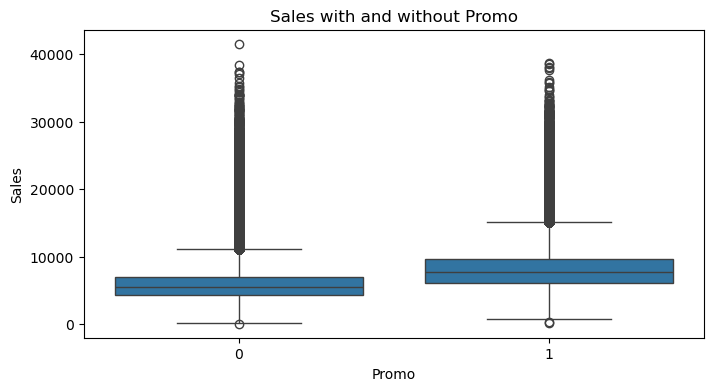

In [13]:
# 📈 2. Sales during promos
plt.figure(figsize=(8, 4))
sns.boxplot(x='Promo', y='Sales', data=df)
plt.title("Sales with and without Promo")
plt.savefig(f'../outputs/sales_vs_promo_{timestamp}.png')
plt.show()
logging.info("Saved: sales_vs_promo plot")

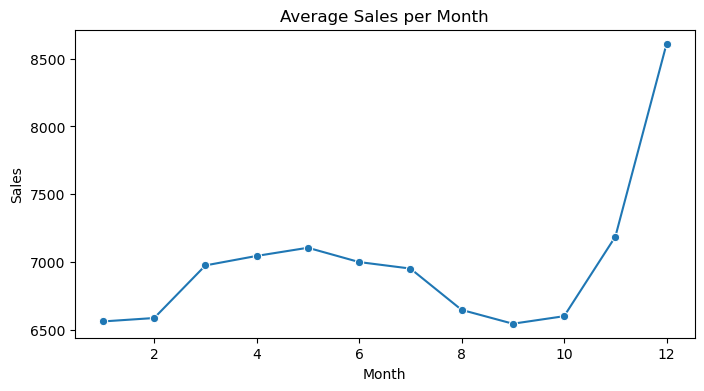

In [15]:
# 📈 3. Monthly average sales
monthly_avg = df.groupby('Month')['Sales'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Sales', data=monthly_avg, marker='o')
plt.title("Average Sales per Month")
plt.savefig(f'../outputs/monthly_avg_sales_{timestamp}.png')
plt.show()
logging.info("Saved: monthly_avg_sales plot")

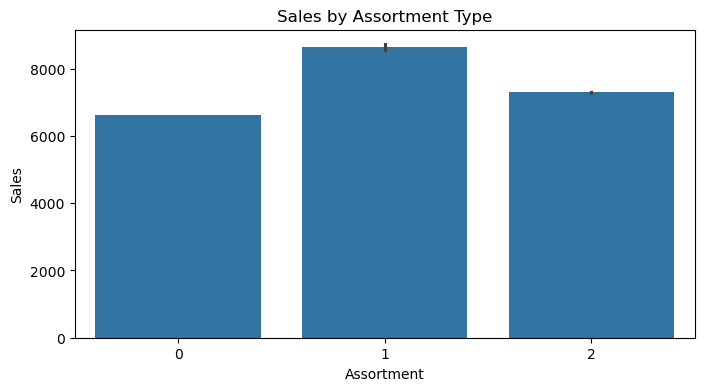

In [18]:
# 📈 4. Assortment vs sales
plt.figure(figsize=(8, 4))
sns.barplot(x='Assortment', y='Sales', data=df)
plt.title("Sales by Assortment Type")
plt.savefig(f'../outputs/sales_by_assortment_{timestamp}.png')
plt.show()
logging.info("Saved: sales_by_assortment plot")

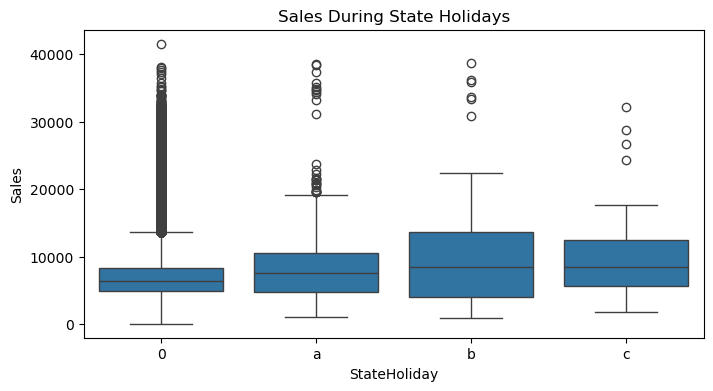

In [19]:
# 📈 5. StateHoliday vs sales
plt.figure(figsize=(8, 4))
sns.boxplot(x='StateHoliday', y='Sales', data=df)
plt.title("Sales During State Holidays")
plt.savefig(f'../outputs/sales_vs_stateholiday_{timestamp}.png')
plt.show()
logging.info("Saved: sales_vs_stateholiday plot")

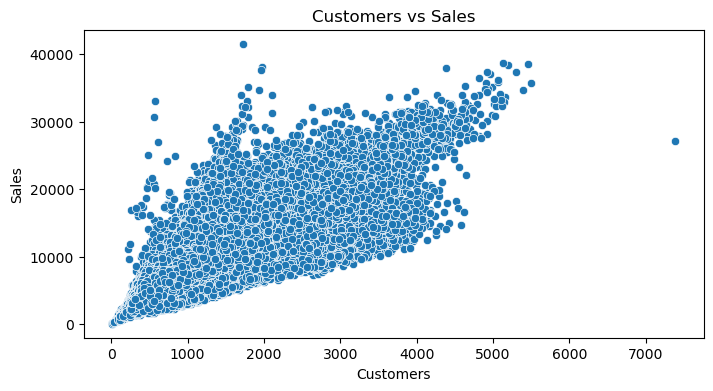

In [22]:
# 📈 6. Correlation between Customers and Sales
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Customers', y='Sales', data=df)
plt.title("Customers vs Sales")
plt.savefig(f'../outputs/customers_vs_sales_{timestamp}.png')
plt.show()
logging.info("Saved: customers_vs_sales plot")

In [24]:
# Summary of average sales by promo
summary = df.groupby('Promo')['Sales'].mean().reset_index()
print("Average Sales with and without Promo:")
print(summary)


Average Sales with and without Promo:
   Promo        Sales
0      0  5929.826183
1      1  8228.739731


In [26]:
logging.info("🎯 Completed EDA for store_train dataset.")
print("✅ EDA complete. All plots saved to '../outputs/'. Move to 03_ml_modeling.ipynb next.")


✅ EDA complete. All plots saved to '../outputs/'. Move to 03_ml_modeling.ipynb next.


In [28]:
df = pd.read_csv('../data/store_train_20250621_143714.csv', dtype={'StateHoliday': str})
